<a href="https://colab.research.google.com/github/saeedd1/draw/blob/main/maghale2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as p
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))



datafile (1).csv
datafile (2).csv
datafile (3).csv
datafile.csv
produce.csv



In [ ]:
crops_prod_data = pd.read_csv("../input/datafile.csv",index_col='Crop')
print(crops_prod_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Rice to nan
Data columns (total 8 columns):
2004-05    12 non-null float64
2005-06    12 non-null float64
2006-07    12 non-null float64
2007-08    12 non-null float64
2008-09    12 non-null float64
2009-10    12 non-null float64
2010-11    12 non-null float64
2011-12    12 non-null float64
dtypes: float64(8)
memory usage: 936.0+ bytes
None


In [ ]:
print(crops_prod_data)

                     2004-05  2005-06   ...     2010-11  2011-12
Crop                                    ...                     
Rice                   100.0    101.0   ...       117.0    110.0
Wheat                  100.0    101.0   ...       120.0    108.0
Coarse Cereals         100.0    107.0   ...       122.0    136.0
Pulses                 100.0    108.0   ...       137.0    129.0
Vegetables             100.0    109.0   ...       128.0    115.0
Fruits                 100.0     99.0   ...       114.0    119.0
Milk                   100.0     97.0   ...       123.0    124.0
Eggs, Fish and Meat    100.0    102.0   ...       133.0    137.0
Oilseeds               100.0     86.0   ...        99.0    102.0
Sugarcane              100.0     96.0   ...       109.0    107.0
Fibers                 100.0     92.0   ...       138.0    140.0
All Agriculture        100.0     99.0   ...       123.0    122.0
NaN                      NaN      NaN   ...         NaN      NaN

[13 rows x 8 columns]


This dataset  contains production growth data for different crops in India from 2004-05 to 2011-12

In [ ]:
crops_prod_data = crops_prod_data.dropna()
print(crops_prod_data)

                     2004-05  2005-06   ...     2010-11  2011-12
Crop                                    ...                     
Rice                   100.0    101.0   ...       117.0    110.0
Wheat                  100.0    101.0   ...       120.0    108.0
Coarse Cereals         100.0    107.0   ...       122.0    136.0
Pulses                 100.0    108.0   ...       137.0    129.0
Vegetables             100.0    109.0   ...       128.0    115.0
Fruits                 100.0     99.0   ...       114.0    119.0
Milk                   100.0     97.0   ...       123.0    124.0
Eggs, Fish and Meat    100.0    102.0   ...       133.0    137.0
Oilseeds               100.0     86.0   ...        99.0    102.0
Sugarcane              100.0     96.0   ...       109.0    107.0
Fibers                 100.0     92.0   ...       138.0    140.0
All Agriculture        100.0     99.0   ...       123.0    122.0

[12 rows x 8 columns]


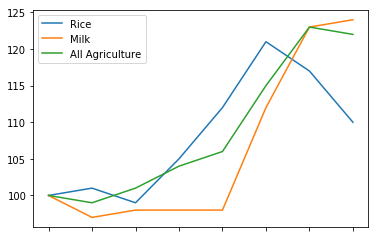

In [ ]:
# plots for crops
crops_prod_data.loc['Rice',:].plot()
crops_prod_data.loc['Milk',:].plot()
crops_prod_data.loc['All Agriculture',:].plot()
plt.legend(loc='upper left')

You can see how Rice production has decreased in comparision to all agriculture

In [ ]:
print(crops_prod_data.index)

Index(['Rice', 'Wheat', 'Coarse Cereals', 'Pulses', 'Vegetables ', 'Fruits',
       'Milk', 'Eggs, Fish and Meat', 'Oilseeds', 'Sugarcane ', 'Fibers',
       'All Agriculture'],
      dtype='object', name='Crop')


In [ ]:
print(crops_prod_data.T)

Crop      Rice  Wheat       ...         Fibers  All Agriculture
2004-05  100.0  100.0       ...          100.0            100.0
2005-06  101.0  101.0       ...           92.0             99.0
2006-07   99.0  112.0       ...           91.0            101.0
2007-08  105.0  115.0       ...           96.0            104.0
2008-09  112.0  117.0       ...          109.0            106.0
2009-10  121.0  127.0       ...          107.0            115.0
2010-11  117.0  120.0       ...          138.0            123.0
2011-12  110.0  108.0       ...          140.0            122.0

[8 rows x 12 columns]


Current size: [6.0, 4.0]


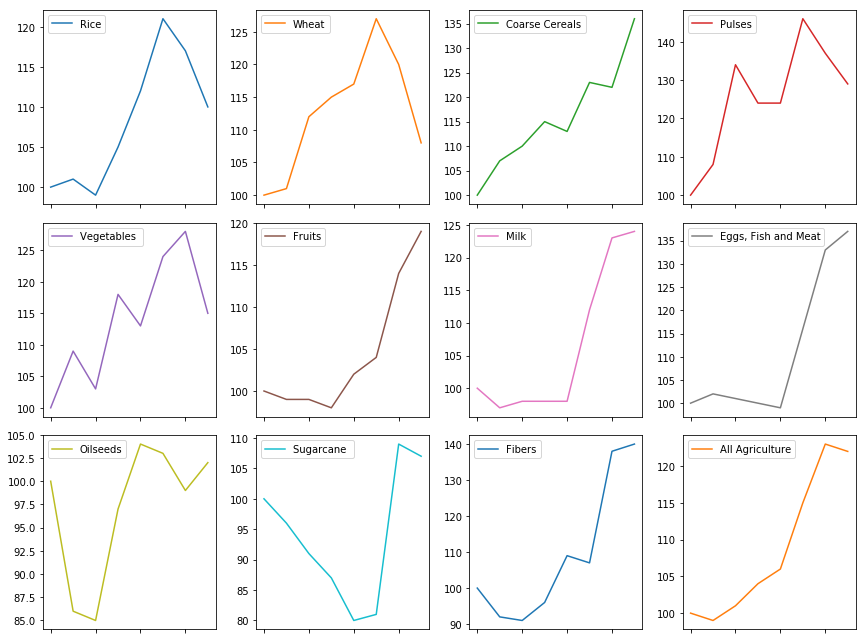

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
 
print("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
crops_prod_data.T.plot(subplots=True,layout=(3,4))
plt.xticks(rotation=45)
plt.tight_layout()


You can see from plots. Milk has exponential increase in production from 2008-09 to 2010-11. Rice, wheat, vegetables and pulses had steep decline in production from 2010-11 to 2011-12. Overall for all agriculture the production has increased from 2004-05 to 2011-12.

In [ ]:
cultivation_data = pd.read_csv("../input/datafile (1).csv")
print(cultivation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
Crop                                     49 non-null object
State                                    49 non-null object
Cost of Cultivation (`/Hectare) A2+FL    49 non-null float64
Cost of Cultivation (`/Hectare) C2       49 non-null float64
Cost of Production (`/Quintal) C2        49 non-null float64
Yield (Quintal/ Hectare)                 49 non-null float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB
None


In [ ]:
print(cultivation_data.head())
print(cultivation_data.columns)

    Crop            ...            Yield (Quintal/ Hectare) 
0  ARHAR            ...                                 9.83
1  ARHAR            ...                                 7.47
2  ARHAR            ...                                 9.59
3  ARHAR            ...                                 6.42
4  ARHAR            ...                                 8.72

[5 rows x 6 columns]
Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')


In [ ]:
cultivation_data['Per Hectare Cost Price'] = cultivation_data['Cost of Production (`/Quintal) C2'] * cultivation_data['Yield (Quintal/ Hectare) ']
cultivation_data['Cost of cultivation per hectare'] = cultivation_data['Cost of Cultivation (`/Hectare) A2+FL'] + cultivation_data['Cost of Cultivation (`/Hectare) C2']
cultivation_data['Yield in Kg per hectare'] = cultivation_data['Yield (Quintal/ Hectare) '] * 100
print(cultivation_data.head())

    Crop           ...           Yield in Kg per hectare
0  ARHAR           ...                             983.0
1  ARHAR           ...                             747.0
2  ARHAR           ...                             959.0
3  ARHAR           ...                             642.0
4  ARHAR           ...                             872.0

[5 rows x 9 columns]


In [ ]:
print(cultivation_data.T.head())

                                                  0     ...             48
Crop                                           ARHAR    ...          WHEAT
State                                  Uttar Pradesh    ...      Rajasthan
Cost of Cultivation (`/Hectare) A2+FL        9794.05    ...        19119.1
Cost of Cultivation (`/Hectare) C2           23076.7    ...        29876.4
Cost of Production (`/Quintal) C2            1941.55    ...         683.58

[5 rows x 49 columns]


In [ ]:
print(cultivation_data.Crop.value_counts())

MAIZE                   5
ARHAR                   5
MOONG                   5
COTTON                  5
GRAM                    5
SUGARCANE               5
RAPESEED AND MUSTARD    5
GROUNDNUT               5
PADDY                   5
WHEAT                   4
Name: Crop, dtype: int64


Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) ',
       'Per Hectare Cost Price', 'Cost of cultivation per hectare',
       'Yield in Kg per hectare'],
      dtype='object')


Text(0, 0.5, 'Yield (Quintal/ Hectare)')

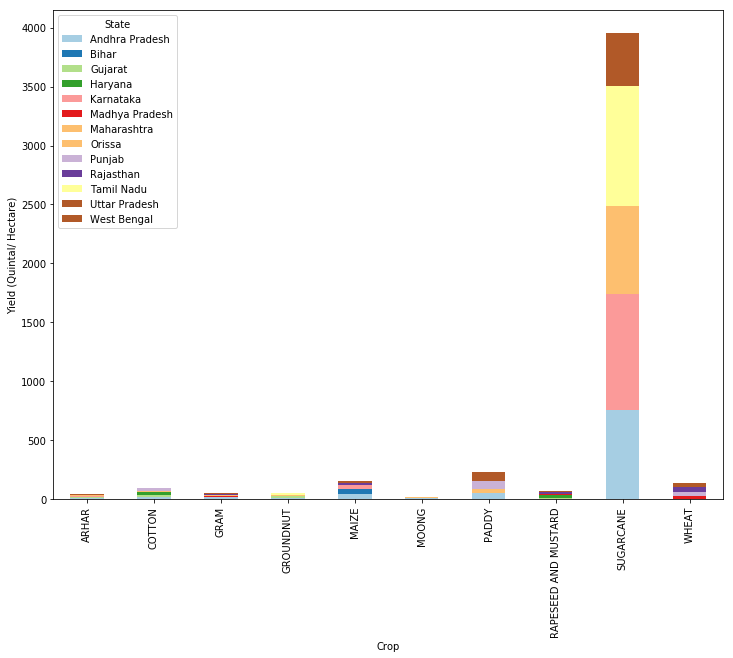

In [ ]:
print(cultivation_data.columns)
columns = ['Crop','State','Yield (Quintal/ Hectare) ']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Yield (Quintal/ Hectare) ')
table = table.fillna(0)
table.plot(kind='bar',stacked=True,colormap='Paired')
plt.ylabel('Yield (Quintal/ Hectare)')


This bar chart provides information of yield of different crops. As yield of different crops vary a lot, sugarcane yield (Quintal/ Hectare) is much more as compared to other crops so it makes this plot much less informative. We will make this plot state wise to make it more informative.

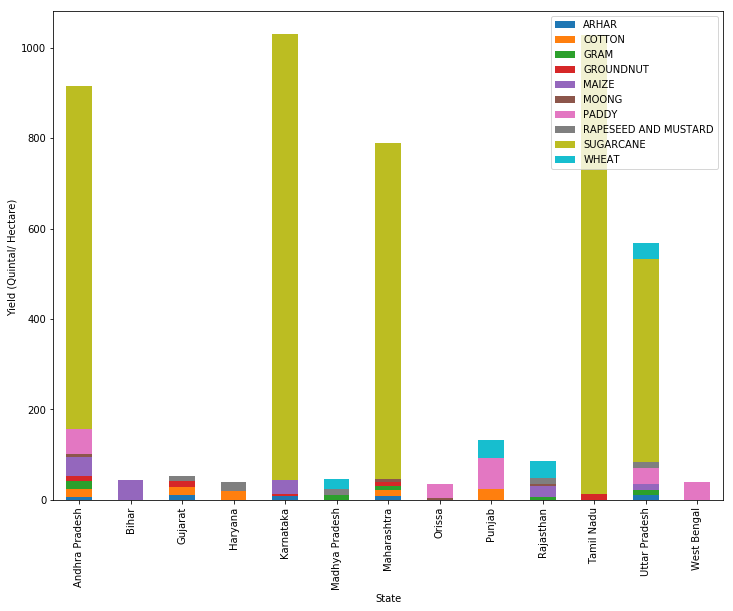

In [ ]:
table.T.plot(kind='bar',stacked=True)
plt.ylabel('Yield (Quintal/ Hectare) ')
plt.legend(loc='best')

The above plot makes more sense than the previous plot. Now you can see Andra Pradesh has data on maximum number of crops and Tamil Nadu has maximum yield of Sugarcane.

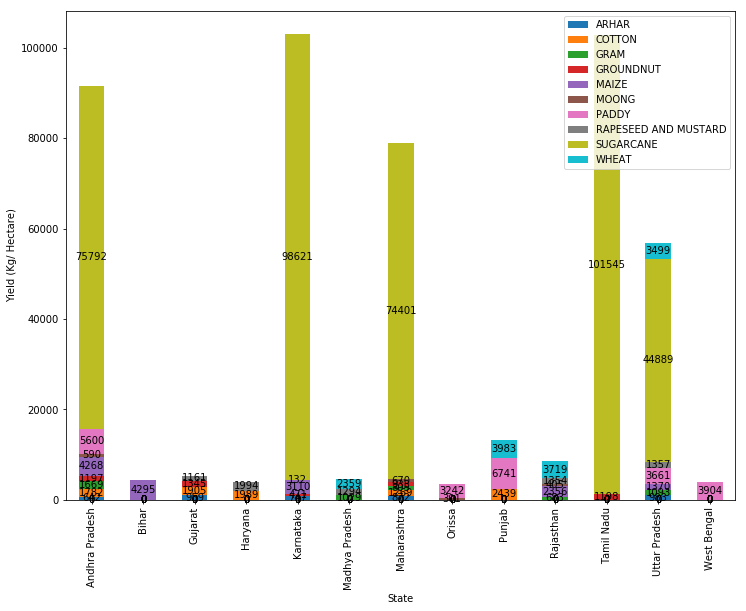

In [ ]:
columns = ['Crop','State','Yield in Kg per hectare']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Yield in Kg per hectare')
table = table.fillna(0)
ax = table.T.plot(kind='bar',stacked=True)
labels = []
for j in table.T.columns:
    for i in table.T.index:
        label = round((int(table.T.loc[i][j])),1)
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2.,y + height/2.,label, ha='center',va='center')

plt.ylabel('Yield (Kg/ Hectare)')
plt.legend(loc='best')

In this plot we added values of yield as kg/Hectare. This information helps us to compare yield of different crops across different states. Due to large number of values, the plot is not formatted well.

Text(0, 0.5, 'Per Hectare Cost Price')

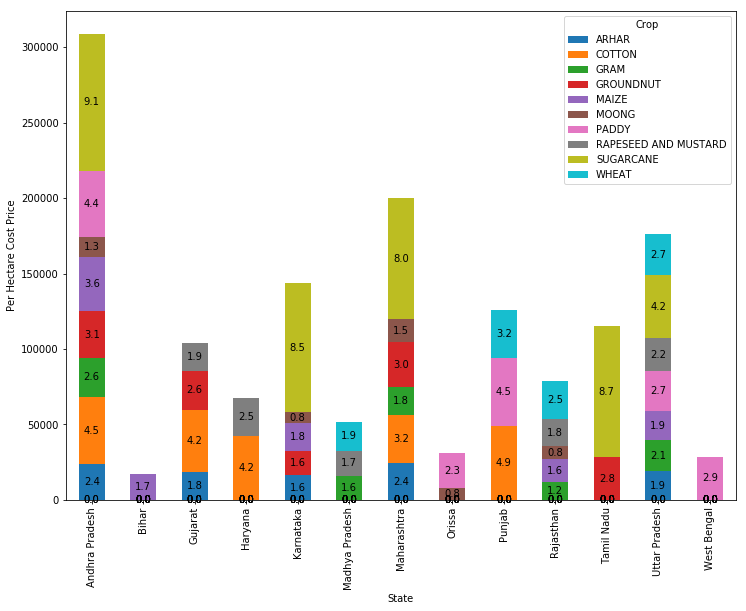

In [ ]:
columns = ['Crop','State','Per Hectare Cost Price']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Per Hectare Cost Price')
table = table.fillna(0)
ax = table.T.plot(kind='bar',stacked=True)
labels = []
for j in table.T.columns:
    for i in table.T.index:
        label = round((int(table.T.loc[i][j])/10000),1)
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2.,y + height/2.,label, ha='center',va='center')

plt.ylabel('Per Hectare Cost Price')


The above plot helps us to compare per hectare cost of different crops across different states. For formatting reasons, cost values are added as factors (actual value/10000 rounded to one digit). You can clearly see Uttar pradesh has lowest per hectare cost for sugarcane but it has lowest yield as well (infering from previous plot).

Text(0, 0.5, 'Cost of cultivation per hectare')

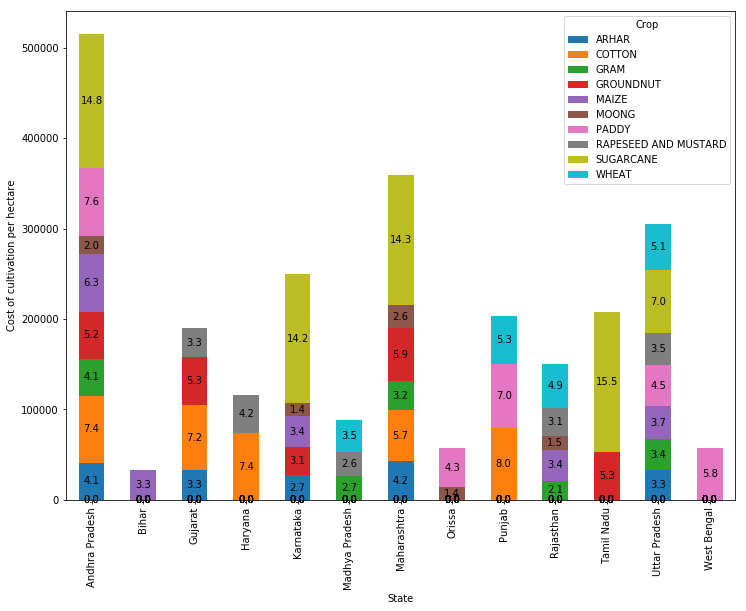

In [ ]:
columns = ['Crop','State','Cost of cultivation per hectare']
new_data = cultivation_data[columns]
table = new_data.pivot('Crop','State','Cost of cultivation per hectare')
table = table.fillna(0)
ax = table.T.plot(kind='bar',stacked=True)

labels = []
for j in table.T.columns:
    for i in table.T.index:
        label = round((int(table.T.loc[i][j])/10000),1)
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
#    if width > 0:
    x = rect.get_x()
    y = rect.get_y()
    height = rect.get_height()
    ax.text(x + width/2.,y + height/2.,label,ha='center', va='center')
    
plt.ylabel('Cost of cultivation per hectare')


The above plot helps us to compare cost of cultivation of different crops across different states. For formatting reasons, cost values are added as factors (actual value/10000 rounded to one digit). You can clearly see Karnataka has lowest cost of cultivation for Groundnut.

In [ ]:
crop_data = pd.read_csv("../input/datafile (2).csv")
print(crop_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
Crop                  55 non-null object
Production 2006-07    55 non-null float64
Production 2007-08    55 non-null float64
Production 2008-09    55 non-null float64
Production 2009-10    55 non-null float64
Production 2010-11    55 non-null float64
Area 2006-07          55 non-null float64
Area 2007-08          55 non-null float64
Area 2008-09          55 non-null float64
Area 2009-10          55 non-null float64
Area 2010-11          55 non-null float64
Yield 2006-07         55 non-null float64
Yield 2007-08         55 non-null float64
Yield 2008-09         55 non-null float64
Yield 2009-10         55 non-null float64
Yield 2010-11         55 non-null float64
dtypes: float64(15), object(1)
memory usage: 7.0+ KB
None


In [ ]:
print(crop_data.columns)

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')


As you can see Crop column name is having lot of space so it needs to be formatted

In [ ]:
crop_data['Crop'] = crop_data['Crop             ']
del crop_data['Crop             ']
print(crop_data.columns)

Index(['Production 2006-07', 'Production 2007-08', 'Production 2008-09',
       'Production 2009-10', 'Production 2010-11', 'Area 2006-07',
       'Area 2007-08', 'Area 2008-09', 'Area 2009-10', 'Area 2010-11',
       'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09', 'Yield 2009-10',
       'Yield 2010-11', 'Crop'],
      dtype='object')


As there is data available on three different attributes (Production, Area and Yield). We divide our dataframe into three different dataframes, setting Crop column as index in each one.

In [ ]:
columns = ['Crop','Production 2006-07', 'Production 2007-08', 'Production 2008-09','Production 2009-10', 'Production 2010-11']
columns2 = ['Crop','Area 2006-07', 'Area 2007-08', 'Area 2008-09','Area 2009-10', 'Area 2010-11']
columns3 = ['Crop','Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09','Yield 2009-10', 'Yield 2010-11']
production = crop_data[columns]
area = crop_data[columns2]
yd = crop_data[columns3]
print(production.head())
production.index = production['Crop']
area.index = area['Crop']
yd.index = yd['Crop']
del production['Crop']
del area['Crop']
del yd['Crop']

               Crop         ...          Production 2010-11
0  Total Foodgrains         ...                       178.9
1              Rice         ...                       206.4
2             Wheat         ...                       150.8
3             Jowar         ...                       121.8
4             Bajra         ...                       167.9

[5 rows x 6 columns]


In [ ]:
print(production.T.columns)

Index(['Total Foodgrains', 'Rice', 'Wheat', 'Jowar', 'Bajra', 'Maize', 'Ragi',
       'Small millets', 'Barley', 'Coarse Cereals', 'Cereals', 'Gram', 'Arhar',
       'Other Pulses', 'Total Pulses', 'Total Non-Food grains ',
       'Total Oilseeds', 'Groundnut', 'Sesamum', 'Rapeseed &Mustard',
       'Linseed', 'Castor seed', 'Safflower', 'Niger seed', 'Sunflower',
       'Soyabean', 'Nine Oilseeds', 'Coconut', 'Cotton seed', 'Total Fibers',
       'Cotton(lint)', 'Jute', 'Mesta', 'Jute & Mesta', 'Sannhamp ', 'Tea ',
       'Coffee ', 'Rubber ', 'Total Spices', 'Black pepper', 'Dry chilies ',
       'Dry ginger ', 'Turmeric ', 'Arecanut  ', 'Cardamom ', 'Coriander',
       'Garlic  ', 'Total Fruits & Vegetables', 'Potato', 'Tapioca',
       'Sweet potato  ', 'Onion', 'Banana  ', 'Sugarcane', 'Tobacco'],
      dtype='object', name='Crop')


Current size: [12.0, 9.0]


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_tools.py:204: UserWarning: When passing multiple axes, layout keyword is ignored
  "ignored", UserWarning)


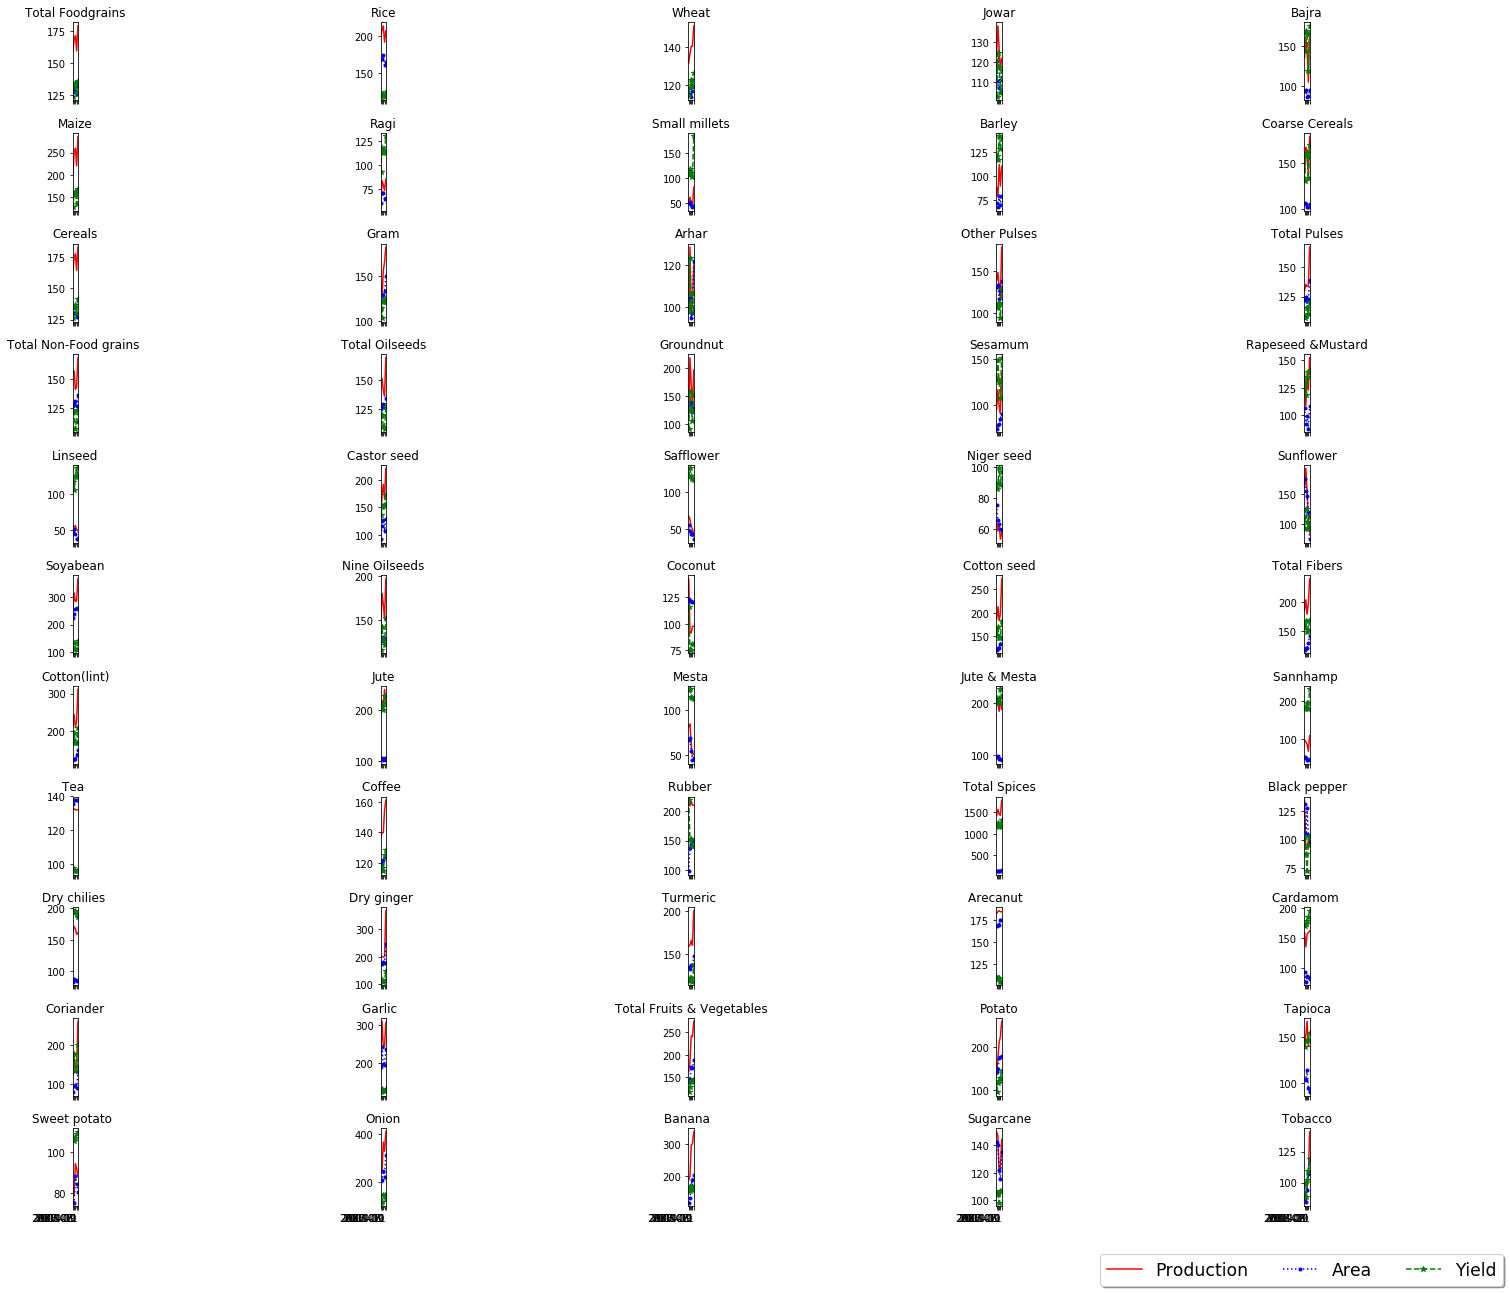

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: current size
print("Current size:", fig_size)
fig_size[0] = 18
fig_size[1] = 18
plt.rcParams["figure.figsize"] = fig_size
i=0
ax = production.T.plot(subplots=True,layout=(11,5),color='red',label='Production',legend=False)
for a in ax.flat:
    a.set_title(production.index[i])
    i += 1
ax1 = area.T.plot(subplots=True,layout=(11,5),ax=ax, linestyle=':',marker='.',color='blue',legend=False)
ax2 = yd.T.plot(subplots=True,layout=(11,5),ax=ax, linestyle='--',marker="*",color='green',legend=False)
labels = ['Production','Area','Yield']
plt.xticks(np.arange(5),('2006-07','2007-08','2008-09','2009-10','2010-11'))
plt.legend(labels=labels,loc='upper center', bbox_to_anchor=(-0.5, -0.5),  shadow=True, ncol=3, fontsize = 'xx-large')

plt.tight_layout()
